In [2]:
!pip uninstall -y inx

Found existing installation: inx 0.0.35
Uninstalling inx-0.0.35:
  Successfully uninstalled inx-0.0.35


In [3]:
!pip install --index-url https://test.pypi.org/simple/ --no-deps inx
!pip install validators
!pip install geopandas 
!pip install matplotlib

Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for inx from https://test-files.pythonhosted.org/packages/b1/24/b3851abcf9e2a15f3893ac7b2de3e78ef416c644465bc76ba74b497a0fee/inx-0.0.36-py3-none-any.whl.metadata


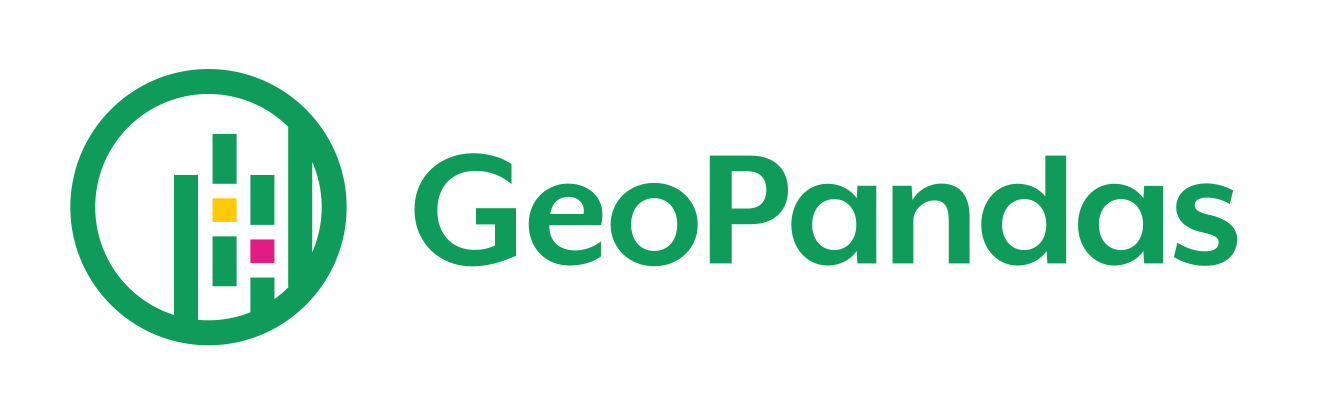

In [4]:
from IPython.display import SVG, display
import requests
input = "https://raw.githubusercontent.com/geopandas/geopandas/main/doc/source/_static/logo/geopandas_logo.svg"
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}
r = requests.get(input, allow_redirects=True, headers=headers)
path_to_file = "logo.svg"
open(path_to_file, 'wb').write(r.content)

display(SVG(filename = path_to_file))

<Axes: >

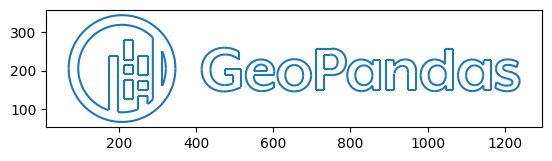

In [8]:
# SVG -> SHAPES
from inx import extension
import geopandas as gpd

logo = extension.run(input = "https://raw.githubusercontent.com/JacekPardyak/inkscape.py/master/data/geopandas_logo.svg",
              extension = "dxf_outlines.py",
              options = "",
              ext = ".dxf")
logo = gpd.read_file(logo)
logo.plot()

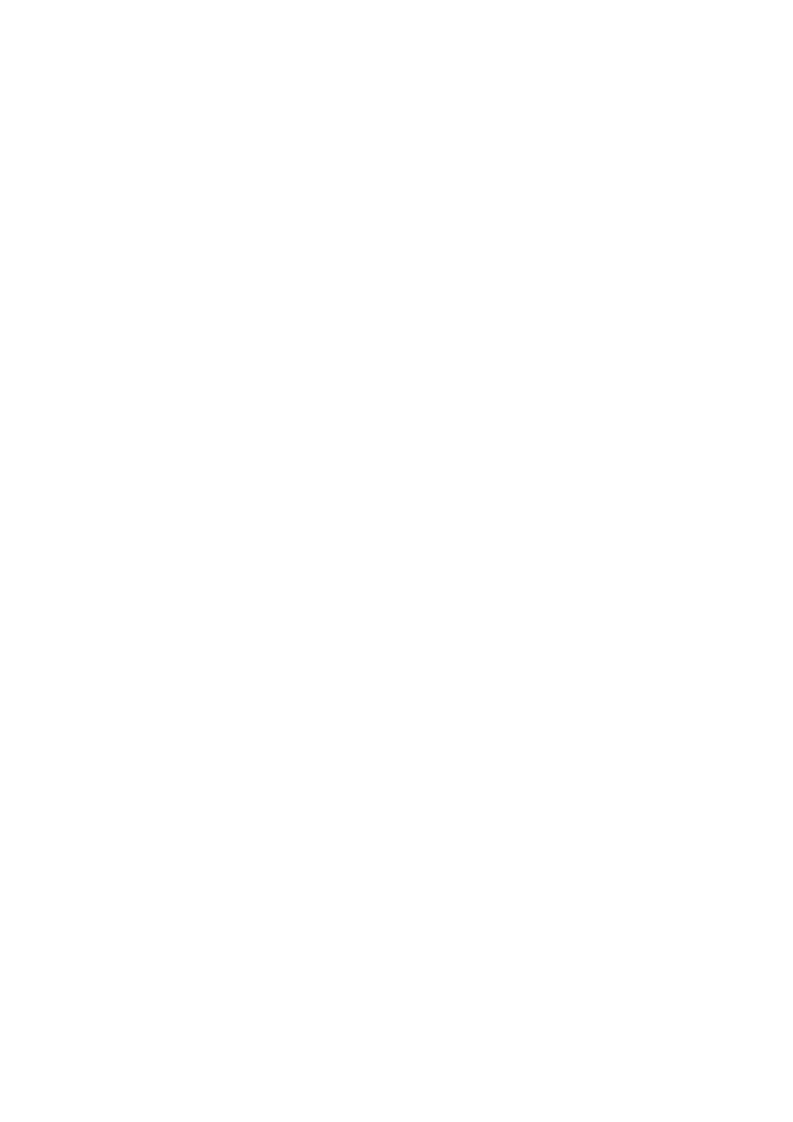

In [9]:
# DXF -> SVG
logo = extension.run(input = "https://coyotex.de/wp-content/uploads/2019/12/Wappentier_gross.dxf",
              extension = "dxf_input.py",
              options = "",
              ext = ".svg")
display(SVG(filename = logo))

In [11]:
from inx import actions
path_to_file = actions.run(input = "https://raw.githubusercontent.com/JacekPardyak/inkscape.py/master/data/geopandas_logo.svg",
            actions = "file-open;select-all;transform-scale:10;page-fit-to-selection;",
            ext = ".svg")
display(SVG(filename = path_to_file))

OSError: [WinError 193] %1 is not a valid Win32 application

In [15]:
import validators
import tempfile
import requests
import shutil
import os
import stat
import subprocess
from inx import extension
import geopandas as gpd

def run_win(input, actions, ext):
  input_file_path = tempfile.NamedTemporaryFile(suffix='.svg').name
  if validators.url(input):
    headers = {'User-Agent': 'INX bot)'}
    r = requests.get(input, allow_redirects=True, headers=headers)
    open(input_file_path, 'wb').write(r.content)
  else:
    shutil.copyfile(input, input_file_path)
  output = tempfile.NamedTemporaryFile(suffix = ext).name
  bat = tempfile.NamedTemporaryFile(suffix='.bat').name
  act = f"--actions=\"{actions}export-filename:{output};export-do\""
  text = f"@ECHO OFF \n inkscape --batch-process {act} \"{input_file_path}\"\n"
  with open(bat, mode='w') as f:
    f.write(text)
  st = os.stat(bat)
  os.chmod(bat, st.st_mode | stat.S_IXUSR | stat.S_IXGRP | stat.S_IXOTH)
  subprocess.call([bat])
  #path = subprocess.check_output(["inkscape", "--shell", act, input_file_path]) #.decode()
  return output

path_to_file = run_win(input = "https://raw.githubusercontent.com/JacekPardyak/inkscape.py/master/data/geopandas_logo.svg",
            actions = "file-open;select-all;transform-scale:.1;page-fit-to-selection;",
            ext = ".svg")
display(SVG(filename = path_to_file))